# Data Analysis- Investigating Titanic Dataset

<b>Questions</b>
<ul>
   <li>Does the Fare indicate if an individual survived or not?</li>
   <li>Does age indicate if an individual survived or not?</li>
   <li>Does gender indicate if an individual survived or not?</li>
</ul>

<b>No Data Conversion is required.</b>

In [422]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [470]:
#import Titanic CSV file to a DataFrame
titanic_file = 'C:\\Users\\edimarco\\DataAnalysisProject\\titanic_data.csv'
titanic_df = pd.read_csv(titanic_file)

# Summary Statistics

In [424]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [425]:
###Review descriptor statisics for dataset
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [426]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Descriptive Statistics Review

The first statistic that jumps out of the dataset is that the survival rate is only about 38%. We will use this survival rate as a baseline for correlation comparisons. The average passenger age is about 30 years old. Also, there is a lot of variability in the Fare paid. The column "Age" contains nulls. However, there is no need to remove them because when using the group by function later, the NAN values are excluded.

In [427]:
###Get count of males and females on the titanic
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [428]:
### Get count of surivors by sex
titanic_df.groupby(['Sex']).sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

Interesting Note: Only about 19% of males survived while about 74% of women survived.

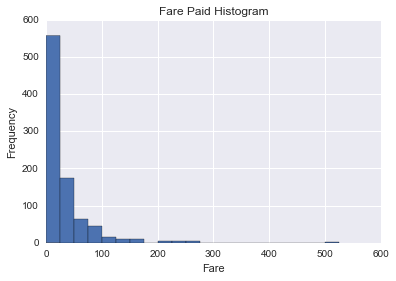

In [429]:
###Review Fare Distibution (Histogram)

plt.hist(titanic_df.Fare,bins=[0, 25, 50, 75, 100, 125, 150,175,200,225,250,275,300,325,350,375,400,425,450,475,500,525])
plt.title("Fare Paid Histogram")
plt.xlabel("Fare")
plt.ylabel("Frequency")


Interesting Note: The vast majority of individuals paid under $25 for their fare. It will be interesting to see how the fare plays into the survival rate of the individuals.

# Statistical Research into the effect in which Fare paid, Age and Gender have on the survival rate.

## Correlation between the fare paid and the survival rate.

Step 1 : Group by survived to see if it has any correlation to whether or not the individual survived or not.

In [430]:
### Group the titanic data by fare paid
### create a plot of fare and the survival rate
### Calculate Pearson's R for the relationship between survival rate and fare paid.

titanic_df.groupby(['Survived'])['Fare'].describe().loc[:, ['mean','std']]

Survived      
0         mean    22.117887
          std     31.388207
1         mean    48.395408
          std     66.596998
Name: Fare, dtype: float64

Step 2 Create a scatter plot to see if there is any clear correlation.

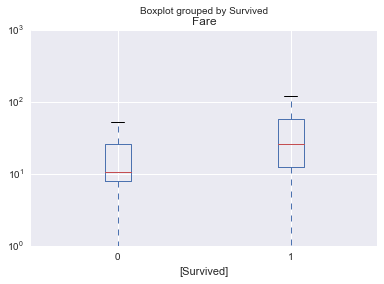

In [446]:
### Create Box Plot with Survived on X axis and log of fare on y_axis

ax = titanic_df.boxplot(column=['Fare'], by=['Survived'])
ax .set_yscale('log')

The above box plot identifies a slight positive correlation between the fare paid and the survival rate. There appears to be a slighly lower survival rate for those paying lower fares. Also, the survivors have a larger interquartile range (larger spread in the fares paid). Those who survived have a more normally distributed fare compared to the negatively skewed distribution for those who did not survive.

Step 3 : Calculate Pearson's R

In [432]:
def standardize(df):
    '''
    standardize each column of the given
    DataFrame. Convert each value to the
    number of standard deviations it is above or below the mean.
    
    This function uses vectorized operations instead of using apply
    '''

    return (df - df.mean())/df.std(ddof=0)

In [433]:
def correlation(x, y):
    '''
    Compute the correlation between the two
    input variables. Each input is a Pandas Series.
    
    correlation = average of (x in standard units) times (y in standard units)
    '''
    correl_var = (standardize(x) * standardize(y)).mean()
    
    return correl_var

In [434]:
###Creating Variables and Computing Pearson's R
###Output is the Pearson's R Calculation

fare = titanic_df['Fare']
survived = titanic_df['Survived']

print correlation(fare, survived)

0.257306522385


About 26% of the variation in the survival rate can be described by the fare the individual paid. 
Keep in mind that no machine learning algorithms have been applied to more correctly calculate the correlation.

Step 4 : Repeat Steps 1,2,3 for comparing age and survival rate.

## Correlation between age and the survival rate.

Step 1 : Group by age to see if it has any correlation to whether or not the individual survived or not.

In [435]:
### Group the titanic data by age (group by excludes NAN)
### create a plot of age and the survival rate
### Calculate Pearson's R for the relationship between survival rate and age.

titanic_grouped_data_age = titanic_df.groupby(['Age'],as_index=False).mean()

In [436]:
###View the first 5 Records

titanic_grouped_data_age.head()

,Age,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,0.42,804.0,1.0,3.0,0.0,1.0,8.5167
1,0.67,756.0,1.0,2.0,1.0,1.0,14.5000
2,0.75,557.5,1.0,3.0,2.0,1.0,19.2583
3,0.83,455.5,1.0,2.0,0.5,1.5,23.8750
4,0.92,306.0,1.0,1.0,1.0,2.0,151.5500


Step 2 : Create a scatter plot to see if there is any clear correlation.

In [505]:
###Separate survival rate by age range and gender
bins = np.array([0,10,20,30,40,50,60,70,80]) 
groups = titanic_df.groupby((pd.cut(titanic_df.Age, bins,labels=["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80"])))['Survived']
output = groups.mean().dropna()

In [508]:
output

Age
0-10     0.593750
10-20    0.382609
20-30    0.365217
30-40    0.445161
40-50    0.383721
50-60    0.404762
60-70    0.235294
70-80    0.200000
Name: Survived, dtype: float64

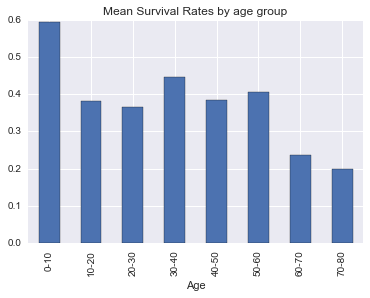

In [513]:
### Create Scatter Plot with Age on X axis and survival rate on the Y axis.
age_plot = output.plot.bar(stacked=True)
age_plot.set_title('Mean Survival Rates by age group')

The plot does not indicate a clear correlation between age and whether or not an individual survived. However, we do see that there is a slight correlation to show that there was a lower mean survival rate as the age range increases with only about a 20% survival rate among the 70-80 age range. We will investigate this further when looking at the correlation (pearson's r.)

Step 3 : Calculate Pearson's R

In [438]:
age = titanic_df['Age']
survived = titanic_df['Survived']

print correlation(age, survived)

-0.0779826784139


The Pearson's R Calculation can range from -1 to 1. In this case there is a slight negative correlation between age and the survival rate. The r calculation is only at -7% so it is a very low correlation. When learning about machine learning it will be interesting to see how combining the age, gender and fare in one machine learning algorithm to see how the relationship changes when using more than one variable.

Step 4 : Repeat Steps 1,2,3 for comparing gender and survival rate.

## Correlation between gender and the survival rate.

Step 1 : Group by Sex to see if it has any correlation to whether or not the individual survived or not.

In [439]:
### Group the titanic data by Sex
### create a plot of Sex and the survival rate
### Calculate Pearson's R for the relationship between survival rate and Sex.

titanic_df.Sex = titanic_df.Sex.astype("category")
titanic_grouped_data_sex = titanic_df.groupby(['Sex'],as_index=False).mean()

Step 2 : Create a scatter plot to see if there is any clear correlation.

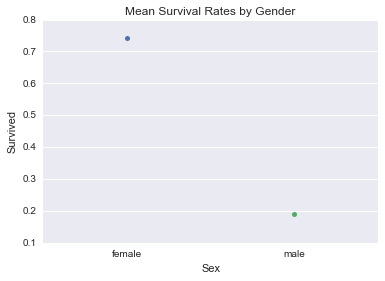

In [515]:
### Create Seaborn Plot with Sex on X axis and survival rate on the Y axis.

gender_plot = sns.stripplot(x="Sex", y="Survived", data=titanic_grouped_data_sex)
gender_plot.set_title('Mean Survival Rates by Gender')

The bar plot makes it very easy to see the differences in the survival rate between males and females. Females have about a 74% survival rate while males have about a 20% survival rate. Based on the bar plot, sex may be the single most determining factor of the survival rate. We will confirm by calculating pearson's R.

Step 3 : Calculate Pearson's R

In [441]:
titanic_series = titanic_df['Sex'].apply(convert_gender)

In [442]:
###Need to convert to numeric data because earlier I had changed the type to category.
titanic_series = pd.to_numeric(titanic_series)

In [443]:
titanic_df['Sex'] = titanic_series

In [444]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [445]:
sex = titanic_df['Sex']
survived = titanic_df['Survived']

print correlation(sex, survived)

0.543351380658


About 54% of the variability in the survival rate can be described by the sex the individual. 
Keep in mind that no machine learning algorithms have been applied to more correctly calculate the correlation. It is very surprising to see such a hugh difference in the survival rate of men versus the survival rate of women. Based on the scatter plot it appears about 20% of men survived while about 75% of women survived.

# Conclusion

The variable with the highest tested correlation to the survival rate is sex. This is a bit surprising as I was expecting the fare paid to have the highest correlation to an individual surviving. The most surprising piece of this data is the dramatic difference in the survival rate of males vs females (20% to 75%). Other interesting points include that the average fare was $32 but the maximum was $512. Also, the average age was about 30 years old. Finally, the survival rate among all passengers was about 38%. 

Note: More complex statistical tests can be done with machine learning and other algorithms.